 ## 선형회귀분석 사용을 위한 조건들 분석 
 
    최초 작성일 : 2020/03/19
    작성자 : 조예슬 
 
    + 선형회귀분석 사용하기 위한 조건
    
        1) 독립변수값에 해당하는 종속변수 값들은 정규분포를 이뤄야하고
        
           모든 정규분포의 분산은 동일해야한다
           
           -> shapiro.test(), bartlett.test() 이용
           
        2) 종속변수값들은 통계적으로 서로 독립적이어야한다
        
           -> 선형회귀분석 시에 Durbin-Watson값
           
        3) 독립변수끼리 다중공선성이 존재하지 않아야한다
        
           -> sqrt(vif()) 이용
 
 
    < 작성 내용 >
      
        - p-value(로지스틱 회귀분석 이용)를 통한 연관성 알아보기
        
        - 다중공선성 알아보기
            
    < 수정 내용 > 
    
        20/03/20
        - step() 이용하여 사용 가능한 변수 알아보기
        
        - regsubsets() 이용하여 사용 가능한 변수 알아보기
        
        - shapiro.test() 이용하여 정규분포 확인
        
        - bartlett.test() 이용하여 등분산 확인
            

In [1]:
# 데이터 불러오기

total <- read.csv("data/comp_sV1.csv")
str(total)
head(total)

'data.frame':	96 obs. of  14 variables:
 $ X               : int  0 1 2 3 4 5 6 7 8 9 ...
 $ sex             : Factor w/ 2 levels "Female","Male": 1 2 1 2 1 1 1 1 1 1 ...
 $ age_class       : int  20 20 20 20 20 30 30 20 30 20 ...
 $ definition      : Factor w/ 2 levels "bright","harmony": 1 2 1 1 1 2 2 1 2 2 ...
 $ need            : Factor w/ 2 levels "bright","harmony": 1 2 1 2 1 2 1 1 1 2 ...
 $ interest        : int  3 5 5 3 3 4 3 3 5 1 ...
 $ comp            : int  0 0 0 0 0 0 0 0 0 0 ...
 $ triangle1       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ triangle2       : int  0 1 0 0 0 0 0 0 0 0 ...
 $ doubleness1     : int  1 0 1 0 0 0 0 0 1 0 ...
 $ doubleness2     : int  0 0 0 0 0 0 1 1 0 0 ...
 $ doubleness3     : int  0 0 0 0 0 0 0 0 1 0 ...
 $ purpose_clothes : int  1 1 1 1 NA 1 1 NA 1 1 ...
 $ purpose_cosmetic: int  NA NA NA NA 1 NA NA 1 1 NA ...


X,sex,age_class,definition,need,interest,comp,triangle1,triangle2,doubleness1,doubleness2,doubleness3,purpose_clothes,purpose_cosmetic
0,Female,20,bright,bright,3,0,0,0,1,0,0,1,NA
1,Male,20,harmony,harmony,5,0,0,1,0,0,0,1,NA
2,Female,20,bright,bright,5,0,0,0,1,0,0,1,NA
3,Male,20,bright,harmony,3,0,0,0,0,0,0,1,NA
4,Female,20,bright,bright,3,0,0,0,0,0,0,NA,1
5,Female,30,harmony,harmony,4,0,0,0,0,0,0,1,NA


In [2]:
# 결측치 제거

total[is.na(total)] <- 0
total

X,sex,age_class,definition,need,interest,comp,triangle1,triangle2,doubleness1,doubleness2,doubleness3,purpose_clothes,purpose_cosmetic
0,Female,20,bright,bright,3,0,0,0,1,0,0,1,0
1,Male,20,harmony,harmony,5,0,0,1,0,0,0,1,0
2,Female,20,bright,bright,5,0,0,0,1,0,0,1,0
3,Male,20,bright,harmony,3,0,0,0,0,0,0,1,0
4,Female,20,bright,bright,3,0,0,0,0,0,0,0,1
5,Female,30,harmony,harmony,4,0,0,0,0,0,0,1,0
6,Female,30,harmony,bright,3,0,0,0,0,1,0,1,0
7,Female,20,bright,bright,3,0,0,0,0,1,0,0,1
8,Female,30,harmony,bright,5,0,0,0,1,0,1,1,1
9,Female,20,harmony,harmony,1,0,0,0,0,0,0,1,0


In [3]:
# 로지스틱 회귀분석 
# 종속변수가 이항변수인 경우에 사용 

result <- glm(comp ~ sex + definition + need + purpose_clothes + purpose_cosmetic 
              + interest + age_class, family=binomial, data=total)

summary(result)


Call:
glm(formula = comp ~ sex + definition + need + purpose_clothes + 
    purpose_cosmetic + interest + age_class, family = binomial, 
    data = total)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.91974  -0.33018  -0.21494  -0.00009   2.65833  

Coefficients:
                    Estimate Std. Error z value Pr(>|z|)  
(Intercept)       -2.277e+01  3.526e+03  -0.006   0.9948  
sexMale            3.238e+00  1.804e+00   1.795   0.0726 .
definitionharmony  1.742e+01  3.526e+03   0.005   0.9961  
needharmony       -7.306e-01  1.298e+00  -0.563   0.5734  
purpose_clothes    3.781e-04  1.802e+00   0.000   0.9998  
purpose_cosmetic   2.192e+00  1.835e+00   1.194   0.2325  
interest           1.271e-01  4.378e-01   0.290   0.7715  
age_class         -1.256e-02  5.705e-02  -0.220   0.8258  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 33.255  on 95  degrees of fre

### glm() 설명

    + Call
     : 구축한 모형에 대해 다시 상기
    + Deviance Residuals
    : Deviance residual에 대한 정보를 알려주는데, model fitting이 잘 되었는지에 대한 measure이다. 
      이를 통해 모델이 잘 적합됐는지를 평가할 수 있다.
    + Coefficient
     : 회귀계수와 그것들의 표준편차, z-statistics(wals's z-statistics), p-value를 나타낸다.
     : p-value가 0.05보다 작은 변수 통계적으로 유의하다고 해석 할 수 있다 
     : p-value가 가장 낮은 것 예측력이 좀 더 강한것
     
----------------------------
### 결과 해석

    p-value 값이 0.05보다 작은 변수가 통계적으로 유의하다고 해석 할 수 있다
    하지만 주어진 결과값을 보면 
    모든 변수의 p-value 값이 0.05보다 크기 때문에 
    모든 변수가 통계적으로 유의하다고 볼 수 없다

In [4]:
# 다중공선성
library(car)

sqrt(vif(result))
# 2 넘는 건 없다 

Warning message:
"package 'car' was built under R version 3.6.3"Loading required package: carData


sex       definition             need  purpose_clothes 
        1.504494         1.000000         1.063551         1.369404 
purpose_cosmetic         interest        age_class 
        1.701458         1.065025         1.095006

### sqrt(vif()) 설명

    다중공선성 
    서로 관련 없는 것 기리 묶여있어야 한다
    2보다 크면 다중공선성에 문제가 있다고 판단

--------------------------
### 결과 해석

    vif의 결과를 보면 2를 넘는 값이 없다
    따라서 각각의 변수들은 다중공선성에 문제가 없다고 판단됨

In [5]:
# 일부가 선형성을 만족하지 않을 때 사용하는 함수
# backward dlimination방법으로 stepwise logistic regression

reduced.model = step(result, direction="both")

Start:  AIC=42.85
comp ~ sex + definition + need + purpose_clothes + purpose_cosmetic + 
    interest + age_class

                   Df Deviance    AIC
- purpose_clothes   1   26.849 40.849
- age_class         1   26.899 40.899
- interest          1   26.934 40.934
- need              1   27.144 41.144
- purpose_cosmetic  1   28.218 42.218
- definition        1   28.322 42.322
<none>                  26.849 42.849
- sex               1   30.864 44.864

Step:  AIC=40.85
comp ~ sex + definition + need + purpose_cosmetic + interest + 
    age_class

                   Df Deviance    AIC
- age_class         1   26.902 38.902
- interest          1   26.937 38.937
- need              1   27.144 39.144
- definition        1   28.336 40.336
<none>                  26.849 40.849
- purpose_cosmetic  1   29.025 41.025
+ purpose_clothes   1   26.849 42.849
- sex               1   31.098 43.098

Step:  AIC=38.9
comp ~ sex + definition + need + purpose_cosmetic + interest

                   Df Dev

### step() 설명

    * 변수 선택법의 '단계적 방법(Stepwise Selection)'
     : 기준 통계치에 가장 도움이 되지 않는 변수를 삭제하거나, 
       모델에서 빠져있는 변수 중에서 기준 통계치를 가장 개선시키는 변수를 추가 
       이러한 변수의 추가 삭제 반복
     : 단계별로  AIC를 가장 작게 만드는 변수 제거 시킴

    * AIC(Akaike Information Criterion)
     : 작을수록 더 좋은 모델을 뜻함
     : AIC를 가장 작게 만드는 변수가 무엇인지 알아보기

    * '-' 
     : 각 변수를 삭제했을 때 AIC의 변화 표현
 
-------------------------------
### 결과 해석

    최종적으로 
    AIC = 34.39
    purpose_cosmetic, sex 변수가 남음
    두 변수는 통계치에 도움이 된다는 것을 의미? 


In [13]:
# 모든 변수가 선형성을 만족하지 않을 때 사용하는 함수
# install.packages("leaps")
library(leaps)

result2 <- regsubsets(comp ~ sex + definition + need + purpose_clothes + purpose_cosmetic 
              + interest + age_class, data = total)
summary(result2)

Subset selection object
Call: regsubsets.formula(comp ~ sex + definition + need + purpose_clothes + 
    purpose_cosmetic + interest + age_class, data = total)
7 Variables  (and intercept)
                  Forced in Forced out
sexMale               FALSE      FALSE
definitionharmony     FALSE      FALSE
needharmony           FALSE      FALSE
purpose_clothes       FALSE      FALSE
purpose_cosmetic      FALSE      FALSE
interest              FALSE      FALSE
age_class             FALSE      FALSE
1 subsets of each size up to 7
Selection Algorithm: exhaustive
         sexMale definitionharmony needharmony purpose_clothes purpose_cosmetic
1  ( 1 ) "*"     " "               " "         " "             " "             
2  ( 1 ) "*"     " "               " "         " "             "*"             
3  ( 1 ) "*"     "*"               " "         " "             "*"             
4  ( 1 ) "*"     "*"               "*"         " "             "*"             
5  ( 1 ) "*"     "*"               "

### regsubsets() 설명
    N개의 설명변수가 있을 때, 각 변수를 추가하거나 뺀 총 2N개의 회귀모델을 만들고 
    이들 모두를 비교하는 방법
    
    1, 2, 3, ..., 7 : 변수의 개수, 모델의 크기
    
    * : 변수가 해당 개수만큼 사용되었을 때 최적의 모델
    
    첫번째 행에 *이 있는 변수를 포함한 모델이 가장 좋다는 의미
    
--------------------
### 결과 해석
    1행을 봤을 때 *은 sexMale에 위치해있다 
    sexMale만을 포함한 모델이 가장 좋다는 것을 의미
    
    *의 생성 순서
    sexMale > purpose_cosmetic > definitionharmony > needharmony > purpose_clothes > age_class > interest

[1]  6.414293  9.163069 13.313239 17.767200 22.267788 26.823968 31.387564

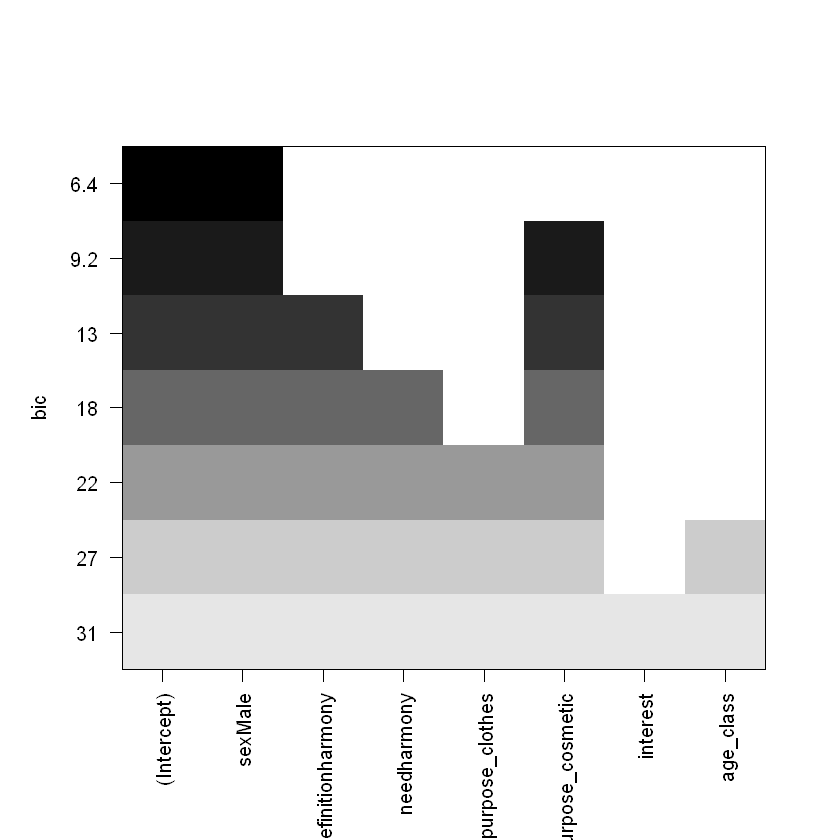

In [17]:
# BIC(Bayes Information Criterion)
summary(result2)$bic

# plot()을 이용하여 BIC 그려보기
# 각변수가 선택되었을 때의 BIC를 좀 더 쉽게 알 수 있다 
plot(result2, scale="bic")

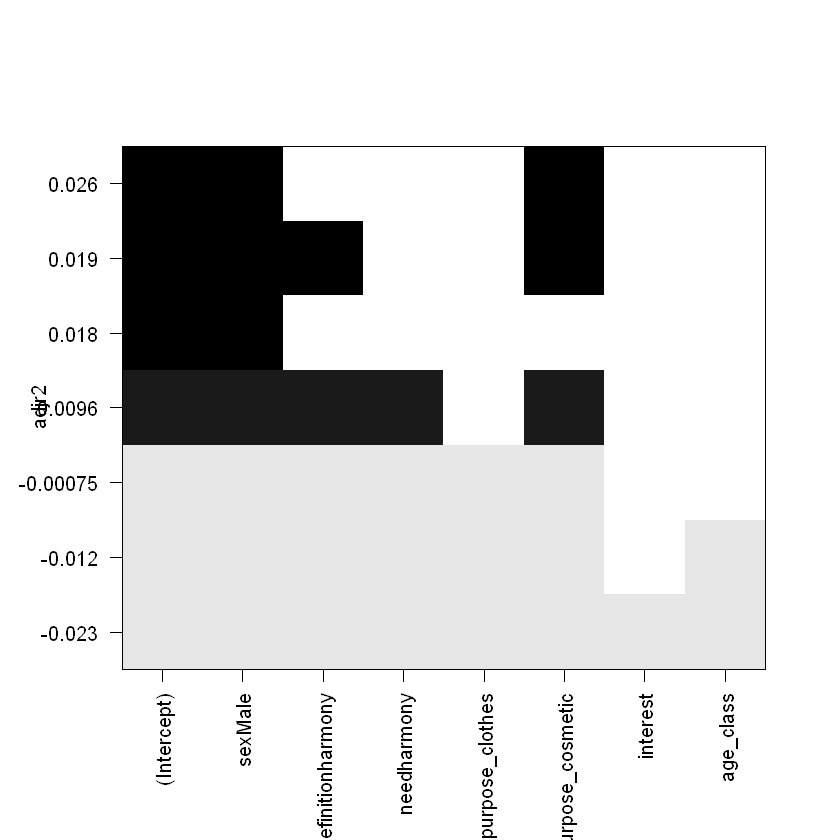

In [16]:
# 수정결정계수
summary(result2)$adjr2

# plot()을 이용하여 수정결정계수 그려보기
# 각변수가 선택되었을 때의 수정 결정 계수를 좀 더 쉽게 알 수 있다 
plot(result2, scale="adjr2")

In [45]:
# 정규분포 확인
# p-value 0.05보다 크면 정규분포O
# p-value 0.05보다 작으면 정규분포X

out0 <- aov(result)
shapiro.test(resid(out0))
# 정규분포 X

out1 <- aov(comp ~ sex, data = total)
shapiro.test(resid(out1))
# 정규분포 X

out2 <- aov(comp ~ definition, data = total)
shapiro.test(resid(out2))
# 정규분포 X

out3 <- aov(comp ~ need , data = total)
shapiro.test(resid(out3))
# 정규분포 X

out4 <- aov(comp ~ purpose_clothes, data = total)
shapiro.test(resid(out4))
# 정규분포 X

out5 <- aov(comp ~ purpose_cosmetic, data = total)
shapiro.test(resid(out5))
# 정규분포 X

out6 <- aov(comp ~ interest, data = total)
shapiro.test(resid(out6))
# 정규분포 X

out7 <- aov(comp ~ age_class, data = total)
shapiro.test(resid(out7))
# 정규분포 X


	Shapiro-Wilk normality test

data:  resid(out0)
W = 0.39922, p-value < 2.2e-16



	Shapiro-Wilk normality test

data:  resid(out1)
W = 0.31387, p-value < 2.2e-16



	Shapiro-Wilk normality test

data:  resid(out2)
W = 0.26646, p-value < 2.2e-16



	Shapiro-Wilk normality test

data:  resid(out3)
W = 0.23475, p-value < 2.2e-16



	Shapiro-Wilk normality test

data:  resid(out4)
W = 0.21603, p-value < 2.2e-16



	Shapiro-Wilk normality test

data:  resid(out5)
W = 0.20587, p-value < 2.2e-16



	Shapiro-Wilk normality test

data:  resid(out6)
W = 0.20602, p-value < 2.2e-16



	Shapiro-Wilk normality test

data:  resid(out7)
W = 0.20172, p-value < 2.2e-16


### 결과 해석

    모든 변수가 정규분포를 이루지 않음

In [35]:
# 등분산 확인
# p-value 0.05보다 크면 등분산O
# p-value 0.05보다 작으면 등분산X

bartlett.test(comp ~ sex, data = total)
# 등분산X

bartlett.test(comp ~ definition , data = total)
# 등분산X

bartlett.test(comp ~  need, data = total)
# 등분산O

bartlett.test(comp ~ purpose_clothes , data = total)
# 등분산O

bartlett.test(comp ~ purpose_cosmetic, data = total)
# 등분산O

bartlett.test(comp ~ interest, data = total)
# 등분산X

bartlett.test(comp ~ age_class, data = total)
# 등분산X


	Bartlett test of homogeneity of variances

data:  comp by sex
Bartlett's K-squared = 28.49, df = 1, p-value = 9.42e-08



	Bartlett test of homogeneity of variances

data:  comp by definition
Bartlett's K-squared = Inf, df = 1, p-value < 2.2e-16



	Bartlett test of homogeneity of variances

data:  comp by need
Bartlett's K-squared = 3.1381, df = 1, p-value = 0.07648



	Bartlett test of homogeneity of variances

data:  comp by purpose_clothes
Bartlett's K-squared = 0.81704, df = 1, p-value = 0.366



	Bartlett test of homogeneity of variances

data:  comp by purpose_cosmetic
Bartlett's K-squared = 0.077204, df = 1, p-value = 0.7811



	Bartlett test of homogeneity of variances

data:  comp by interest
Bartlett's K-squared = Inf, df = 4, p-value < 2.2e-16



	Bartlett test of homogeneity of variances

data:  comp by age_class
Bartlett's K-squared = Inf, df = 4, p-value < 2.2e-16


### 결과 해석

need, purpose_clothes, purpose_cosmetic 등분산 성립
그 외 나머지는 등분산 성립하지 않음

### 최종 결론

    선형회귀분석의 가장 먼저 되어야하는 조건은 정규분포를 이뤄야하는 것이라 생각됨
    하지만 위의 결과로 보면 모든 변수는 정규분포를 이루지 않음
    그렇기에 우리 자료에 선형회귀분석을 사용하는 것이 맞는건지 의문스러움 